# Airbnb Exploratory Data Analysis for New York City

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customer's and provider's (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. This dataset describes the listing activity and metrics in NYC for 2019.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


# Importing Libraries

In [2]:
import numpy as np # Linear Algebra
import pandas as pd # Data Processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data Visualization and Manipulaiton
import matplotlib.image as img # Data Visualization and Manipulaiton
import seaborn as sns # Data Visualization
import plotly.graph_objects as go # Plot Maps
import plotly.express as px # Plot Maps

# Loading the Data

In [3]:
# Reading NYC airbnb data in nyc_df 
nyc_df = pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")

# Understanding the Data

In [4]:
# Viewing the first few lines of the dataset
nyc_df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [5]:
# Viewing the last few lines of the dataset
nyc_df.tail()

id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23

In [6]:
# Checking the number of entries in dataset and number of columns
print(f"The total number of entries :", nyc_df.shape[0])
print(f"The total number of columns :", nyc_df.shape[1])

The total number of entries : 48895
The total number of columns : 16


# Columns Description
1. **id** - Acts as a unique key for each listing in the Airbnb data
2. **name** - Represents the name of the listing
3. **host_id** - Represents the id for the user who hosted the listing
4. **host_name** - Contains the name of the user who hosted the listing 
5. **neighbourhood_group** - Contains the name of the borough the listing is located at
6. **neighbourhood** - Contains the name of the area the listing is located at
7. **latitude** - Contains the latitude of the location
8. **longitude** - Contains the longitude of the location
9. **room_type** - Contains the space type of each listing
10. **price** - Contains the price per night in dollars listed by the host
11. **minimum_nights** - Contains the minimum number of nights the user is required to book
12. **number_of_reviews** - Contains the number of reviews given to each listings
13. **last_review** - Contains the date of last review given to the listing
14. **reviews_per_month** - Contains the number of reviews given per month
15. **calculated_host_listings_count** - Contains the amount of listing per host
16. **availability_365** - Contains the number of days when listing is available for booking


# Column Data Types & Basic Statistics 

In [7]:
# Checking the number of non null values and data types present in the dataset
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
# Understanding the dataset by viewing statistics like Mean, Median, Std. Deviation etc.
pd.options.display.float_format = "{:.2f}".format
nyc_df.describe()

id      host_id  latitude  longitude    price  minimum_nights  \
count    48895.00     48895.00  48895.00   48895.00 48895.00        48895.00   
mean  19017143.24  67620010.65     40.73     -73.95   152.72            7.03   
std   10983108.39  78610967.03      0.05       0.05   240.15           20.51   
min       2539.00      2438.00     40.50     -74.24     0.00            1.00   
25%    9471945.00   7822033.00     40.69     -73.98    69.00            1.00   
50%   19677284.00  30793816.00     40.72     -73.96   106.00            3.00   
75%   29152178.50 107434423.00     40.76     -73.94   175.00            5.00   
max   36487245.00 274321313.00     40.91     -73.71 10000.00         1250.00   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count           48895.00           38843.00                        48895.00   
mean               23.27               1.37                            7.14   
std                44.55               1.68                           32.95   
min                 0.00               0.01                            1.00   
25%                 1.00               0.19                            1.00   
50%                 5.00               0.72                            1.00   
75%                24.00               2.02                            2.00   
max               629.00              58.50                          327.00   

       availability_365  
count          48895.00  
mean             112.78  
std              131.62  
min                0.00  
25%                0.00  
50%               45.00  
75%              227.00  
max              365.00

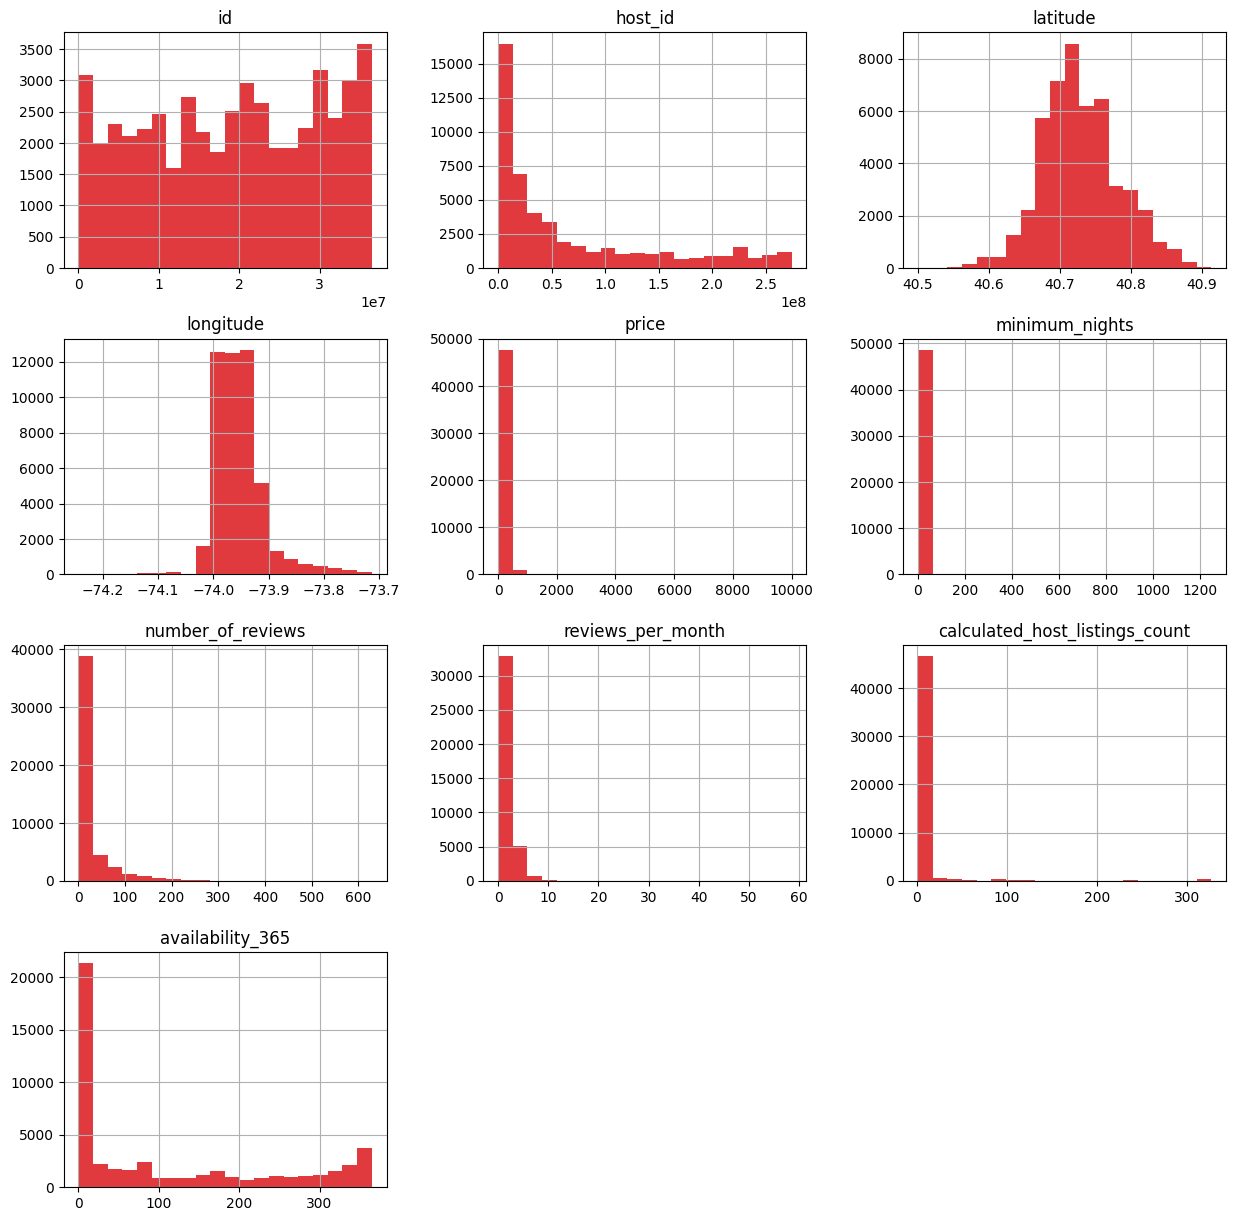

In [9]:
# Visualizing the distribution for every column
nyc_df.hist(figsize=(15, 15), bins = 20, color='#E03A3E')

plt.show()

**From the graphs we can notice that :**

* latitude and longitude columns follow a normal distribution, which means most of the hosts might have lisitngs concetrated in specific area.
* availability_365, all the listings are not available all the year.
* price, most of the hosts have listed price under $1000
* price column seems to have a lot of outliers

# Data Preprocesing & Cleaning
Here we will replace the null values with a suitable value, remove the duplicates and remove unwanted columns in the data.

In [10]:
# Checking number of null values
nyc_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
# Converting the last_review column to timestamp format
nyc_df['last_review'] = pd.to_datetime(nyc_df['last_review'])

The last review will be present only if the hosting was visited atleast once. Meanwhile we can try replacing review_per_month with zero


In [12]:
# Filling null values in reviews_per_month column with zero 
# Filling null values in last_review with a dummy date
# Filling name and host_name columns with blanks
nyc_df = nyc_df.fillna({'reviews_per_month':0,
                        'last_review':'1984-01-01',
                        'name':'',
                        'host_name':''})

In [13]:
# Removing unwanted columns
nyc_df = nyc_df.drop(['id','name'], axis = 1)

In [14]:
# Observation
nyc_df[nyc_df.price == 0]

host_id     host_name neighbourhood_group       neighbourhood  \
23161    8993084      Kimberly            Brooklyn  Bedford-Stuyvesant   
25433  131697576        Anisha               Bronx     East Morrisania   
25634   15787004  Martial Loft            Brooklyn            Bushwick   
25753    1641537        Lauren            Brooklyn          Greenpoint   
25778   10132166       Aymeric            Brooklyn        Williamsburg   
25794   86327101       Adeyemi            Brooklyn  Bedford-Stuyvesant   
25795   86327101       Adeyemi            Brooklyn  Bedford-Stuyvesant   
25796   86327101       Adeyemi            Brooklyn  Bedford-Stuyvesant   
26259   13709292        Qiuchi           Manhattan         Murray Hill   
26841  101970559        Sergii            Brooklyn            Bushwick   
26866  101970559        Sergii            Brooklyn            Bushwick   

       latitude  longitude        room_type  price  minimum_nights  \
23161     40.69     -73.95     Private room      0               4   
25433     40.83     -73.89     Private room      0               2   
25634     40.69     -73.92     Private room      0               2   
25753     40.72     -73.94     Private room      0               2   
25778     40.71     -73.95  Entire home/apt      0               5   
25794     40.68     -73.91     Private room      0               1   
25795     40.68     -73.91     Private room      0               1   
25796     40.68     -73.91     Private room      0               1   
26259     40.75     -73.98  Entire home/apt      0               3   
26841     40.69     -73.91      Shared room      0              30   
26866     40.69     -73.91      Shared room      0              30   

       number_of_reviews last_review  reviews_per_month  \
23161                  1  2018-01-06               0.05   
25433                 55  2019-06-24               2.56   
25634                 16  2019-05-18               0.71   
25753                 12  2017-10-27               0.53   
25778                  3  2018-01-02               0.15   
25794                 93  2019-06-15               4.28   
25795                 95  2019-06-21               4.37   
25796                 95  2019-06-23               4.35   
26259                  0  1984-01-01               0.00   
26841                  2  2019-06-22               0.11   
26866                  5  2019-05-24               0.26   

       calculated_host_listings_count  availability_365  
23161                               4                28  
25433                               4               127  
25634                               5                 0  
25753                               2                 0  
25778                               1                73  
25794                               6               176  
25795                               6               232  
25796                               6               222  
26259                               1                 0  
26841                               6               333  
26866                               6               139

In [15]:
# Removing the zero prices listings as they are only 11 entries and they must have been listed by accident
nyc_df = nyc_df[nyc_df.price != 0]

Removed the zero priced listings as they are only 11 entries and they must have been listed by accident and are most probably inactive

In [16]:
# Removing the duplicated values
nyc_df.duplicated().sum()

0

In [17]:
# Rechecking number of null values
nyc_df.isnull().sum()

host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Viewing the updated statistics

In [18]:
# Let us go through the updated statistics
nyc_df.describe()

host_id  latitude  longitude    price  minimum_nights  \
count     48884.00  48884.00   48884.00 48884.00        48884.00   
mean   67622034.56     40.73     -73.95   152.76            7.03   
min        2438.00     40.50     -74.24    10.00            1.00   
25%     7817310.25     40.69     -73.98    69.00            1.00   
50%    30792573.50     40.72     -73.96   106.00            3.00   
75%   107434423.00     40.76     -73.94   175.00            5.00   
max   274321313.00     40.91     -73.71 10000.00         1250.00   
std    78616662.30      0.05       0.05   240.17           20.51   

       number_of_reviews                    last_review  reviews_per_month  \
count           48884.00                          48884           48884.00   
mean               23.27  2011-08-11 19:59:05.798216448               1.09   
min                 0.00            1984-01-01 00:00:00               0.00   
25%                 1.00            2016-03-24 00:00:00               0.04   
50%                 5.00            2019-01-03 00:00:00               0.37   
75%                24.00            2019-06-19 00:00:00               1.58   
max               629.00            2019-07-08 00:00:00              58.50   
std                44.55                            NaN               1.60   

       calculated_host_listings_count  availability_365  
count                        48884.00          48884.00  
mean                             7.14            112.78  
min                              1.00              0.00  
25%                              1.00              0.00  
50%                              1.00             45.00  
75%                              2.00            227.00  
max                            327.00            365.00  
std                             32.96            131.63

# Questions
1. How many neighbourhoods are present and what kind of room types were offered by users in New York?
2. How many listings are present in each Neighbourhood of New York and what are the price ranges of each Neighbourhood?
3. Observing the prices, are there any outliers in the data and why are they present?
4. Could you map the neighbourhood groups? Is there any noticeable difference of traffic among different areas and what could be the reason for it?
5. Which hosts are the busiest and why?
6. Is there any kind of relation between the columns/variables? 
7. Why are few values reviews_per_month column null?

# Analyzing Neighbourhoods and Room Types offered in New York

> **Q. How many neighbourhoods are present and what kind of room types were offered in New York?**

In [19]:
print(f"Number of Boroughs where listings are available in NYC : ", len(nyc_df['neighbourhood_group'].unique()))
print("\n")
print("They are :")

i = 0
for item in nyc_df['neighbourhood_group'].unique() :
    i += 1
    print(str(i)+". "+ item)

Number of Boroughs where listings are available in NYC :  5


They are :
1. Brooklyn
2. Manhattan
3. Queens
4. Staten Island
5. Bronx


This means that there are listings in every Borough of New York.

In [20]:
print(f"Number of Neighbourhoods : ",len(nyc_df['neighbourhood'].unique()))

Number of Neighbourhoods :  221


In [21]:
print(f"Number of Room Types offered in NYC : ", len(nyc_df['room_type'].unique()))
print("\n")
print("They are :")

i = 0
for item in nyc_df['room_type'].unique() :
    i += 1
    print(str(i)+". "+ item)

Number of Room Types offered in NYC :  3


They are :
1. Private room
2. Entire home/apt
3. Shared room


In [22]:
print(f"Number of Hosts in NYC : ", len(nyc_df['host_id'].unique()))

Number of Hosts in NYC :  37455


# Understanding the Categorical Variables

> **Q. How many listings are present in each Borough of New York and what are the price ranges of each Borough?** 

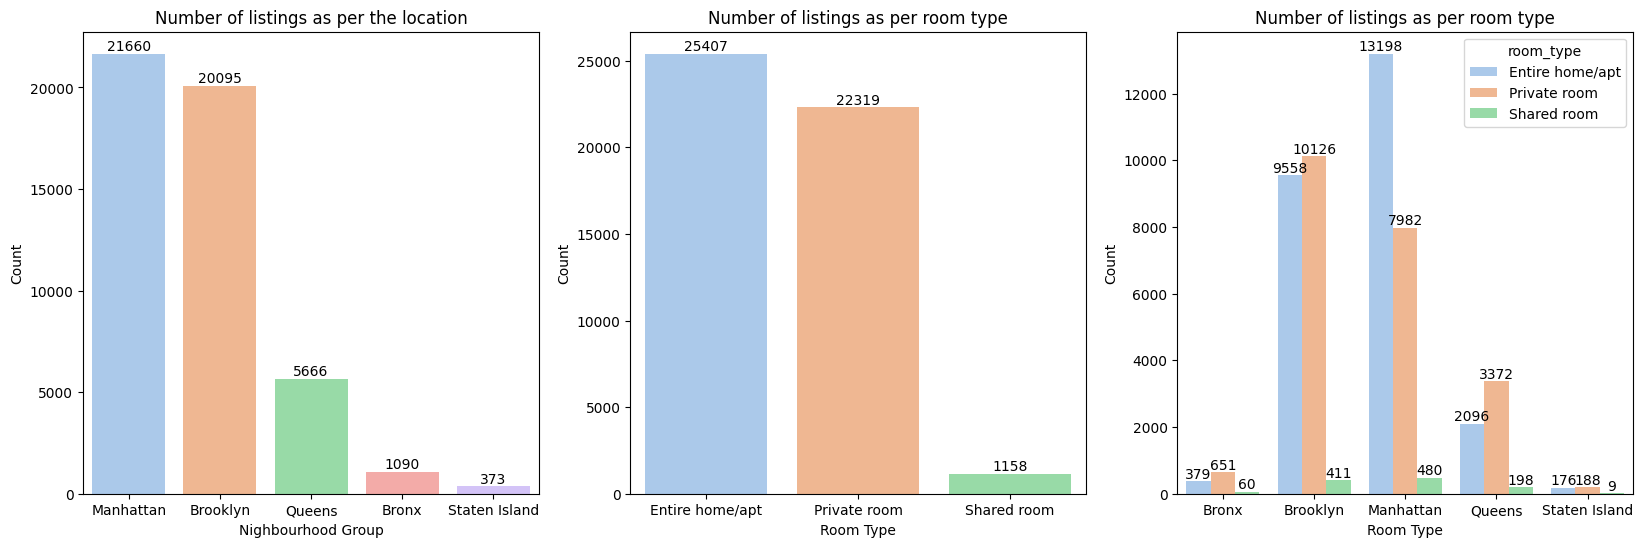

In [23]:
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
nyc_df['neighbourhood_group'] = nyc_df['neighbourhood_group'].astype('category')

ax1 = sns.countplot(data = nyc_df, x = 'neighbourhood_group', order = nyc_df['neighbourhood_group'].value_counts().index, palette = 'pastel')
ax1.bar_label(ax1.containers[0])

plt.title("Number of listings as per the location")
plt.xlabel("Nighbourhood Group")
plt.ylabel("Count")

plt.subplot(1,3,2)
nyc_df['room_type'] = nyc_df['room_type'].astype('category')

ax2 = sns.countplot(data = nyc_df, x = 'room_type', order = nyc_df['room_type'].value_counts().index, palette = 'pastel')
ax2.bar_label(ax2.containers[0])

plt.title("Number of listings as per room type")
plt.xlabel("Room Type")
plt.ylabel("Count")

plt.subplot(1,3,3)
nyc_df['neighbourhood_group'] = nyc_df['neighbourhood_group'].astype('category')

ax3 = sns.countplot(data = nyc_df, x = 'neighbourhood_group', hue = 'room_type', palette = 'pastel')
for container in ax3.containers:
    ax3.bar_label(container) # what if I give percentage instead?

plt.title("Number of listings as per room type")
plt.xlabel("Room Type")
plt.ylabel("Count")



plt.show()

**We observe that:**
* Manhattan and Brooklyn have the most number of listings, while Staten Island have the least number of listings
* Mostly the hosts have listed the entire apartment, and then private rooms. Very few have listed shared rooms
* It can be inferred that the customers are more interested in the private rooms or entire apartments
* Hosts have listed entire apartments when compared to other room types in the Manhattan area 
* Mean while user has a opportunity to choose either entire apartments or private rooms in the other boroughs

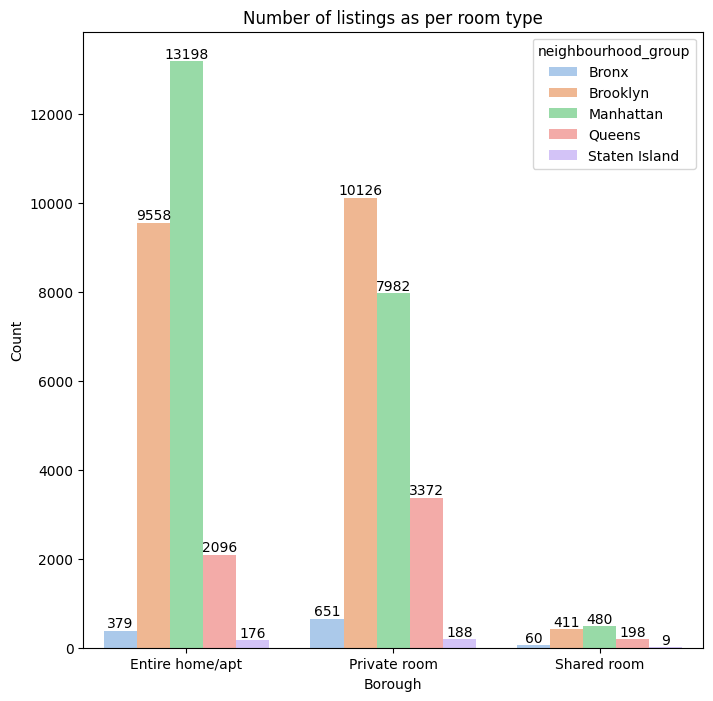

In [24]:
nyc_df['neighbourhood_group'] = nyc_df['neighbourhood_group'].astype('category')

plt.figure(figsize = (8,8))
ax = sns.countplot(data = nyc_df, x = 'room_type', hue = 'neighbourhood_group', palette = 'pastel')
for container in ax.containers:
    ax.bar_label(container)

plt.title("Number of listings as per room type")
plt.xlabel("Borough")
plt.ylabel("Count")
plt.show()

**We observe that:**
* Manhattan has highest number of listings advertising entire apartment in airbnb
* Meanwhile Brooklyn has highest number of private rooms advertised in the listings
* Very few listings are present in every borough advertising shared rooms

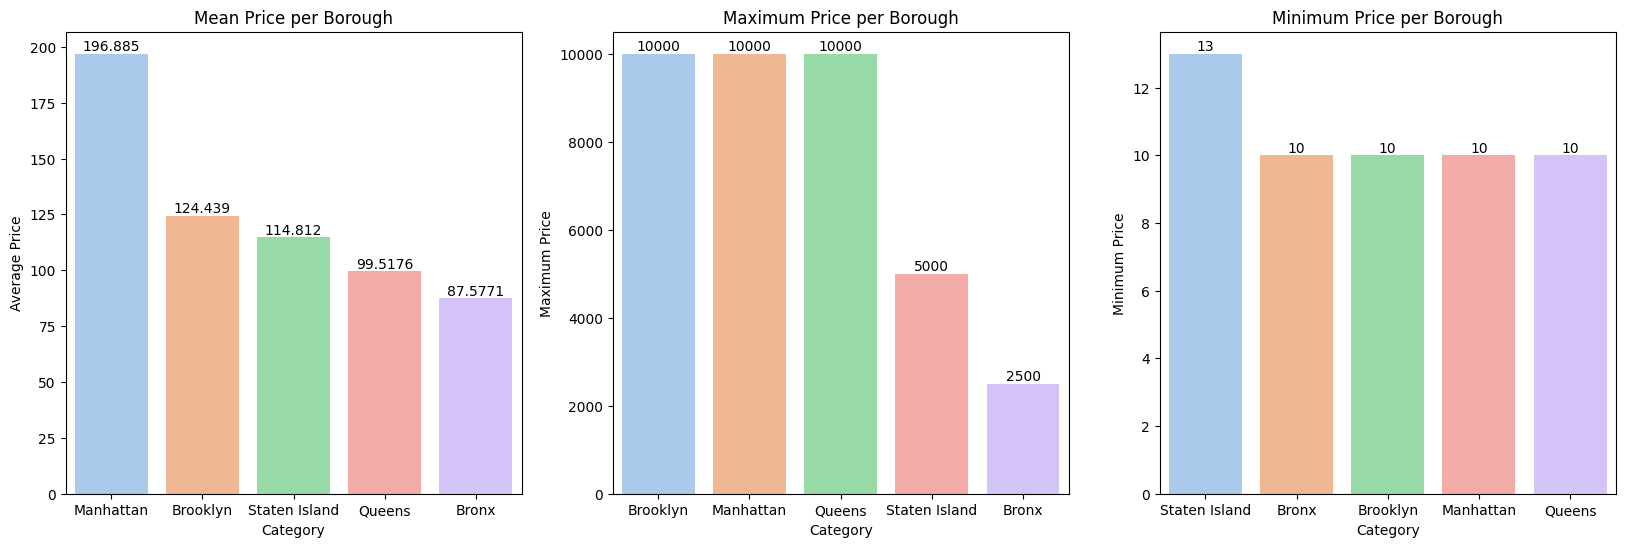

In [25]:
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
average_df = nyc_df.groupby('neighbourhood_group')['price'].mean().reset_index()
ax1 = sns.barplot(x='neighbourhood_group', y='price', data=average_df, 
                  order = average_df.sort_values('price', ascending = False)['neighbourhood_group'], palette='pastel')
ax1.bar_label(ax1.containers[0])

plt.title('Mean Price per Borough')
plt.xlabel('Category')
plt.ylabel('Average Price')

plt.subplot(1,3,2)
max_df = nyc_df.groupby('neighbourhood_group')['price'].max().reset_index()

ax2 = sns.barplot(x='neighbourhood_group', y='price', data = max_df, 
                  order = max_df.sort_values('price', ascending = False)['neighbourhood_group'], palette='pastel')
ax2.bar_label(ax2.containers[0])

plt.title('Maximum Price per Borough')
plt.xlabel('Category')
plt.ylabel('Maximum Price')

plt.subplot(1,3,3)
min_df = nyc_df.groupby('neighbourhood_group')['price'].min().reset_index()

ax3 = sns.barplot(x='neighbourhood_group', y='price', data = min_df, 
                  order = min_df.sort_values('price', ascending = False)['neighbourhood_group'], palette='pastel')
ax3.bar_label(ax3.containers[0])

plt.title('Minimum Price per Borough')
plt.xlabel('Category')
plt.ylabel('Minimum Price')

plt.show()
#why are few minimum prices zero? was there no active listing here?

**We observe that:**
* The listings in the Manhattan seems to be at higher prices. While the listings in other neighbourhood groups are in a similar range
* The maximum price of listing in Brooklyn, Manhattan, Queens are priced at 10000 USD, there is a possibility of presence of outliers in price columns
* While the minimum price fall in a same range of 10-13USD
    * Brooklyn, Manhattan, Queens, Bronx have minimum prices at 10USD
    * Staten Island has minimum price at 13USD

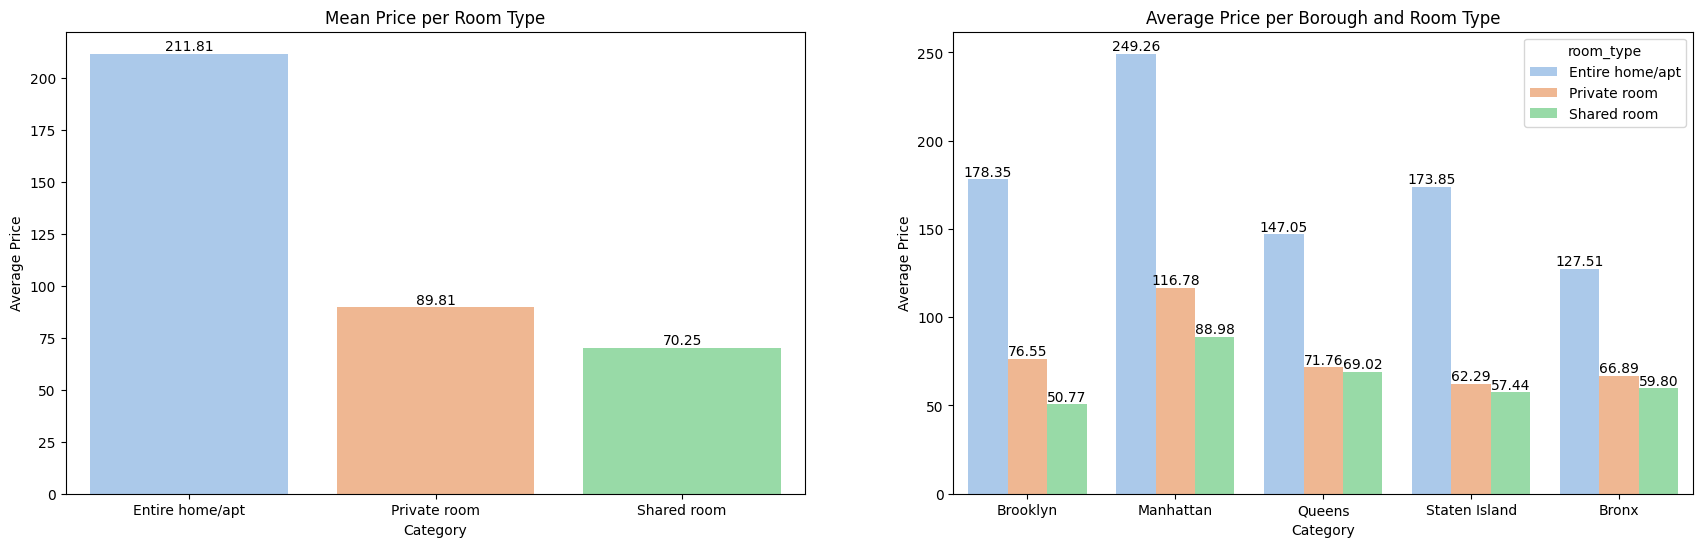

In [26]:
plt.figure(figsize = (21,6))

plt.subplot(1,2,1)
average_room_df = nyc_df.groupby('room_type')['price'].mean().reset_index()
ax1 = sns.barplot(x='room_type', y='price', data=average_room_df, 
                  order = average_room_df.sort_values('price', ascending = False)['room_type'], palette='pastel')
ax1.bar_label(ax1.containers[0], fmt='{:,.2f}')

plt.title('Mean Price per Room Type')
plt.xlabel('Category')
plt.ylabel('Average Price')

plt.subplot(1,2,2)
room_df = nyc_df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index()

ax2 = sns.barplot(x='neighbourhood_group', y='price', data = room_df, hue = 'room_type',
                  order = max_df.sort_values('price', ascending = False)['neighbourhood_group'], palette='pastel')
for container in ax2.containers:
    ax2.bar_label(container, fmt='{:,.2f}')

plt.title('Average Price per Borough and Room Type')
plt.xlabel('Category')
plt.ylabel('Average Price')

plt.show()

**We observe that:**
* The entire apartments are listed the highest with average price around 212 USD, while the shared rooms are priced the least around 70.25 USD
* Seems like the private rooms are 20 USD higher the shared rooms. Which means maybe non price sensitive users might consider booking a private room compared to the shared rooms
* Manhattan has entire apartment type rooms highly priced when compared with the other type of rooms in other parts of the city

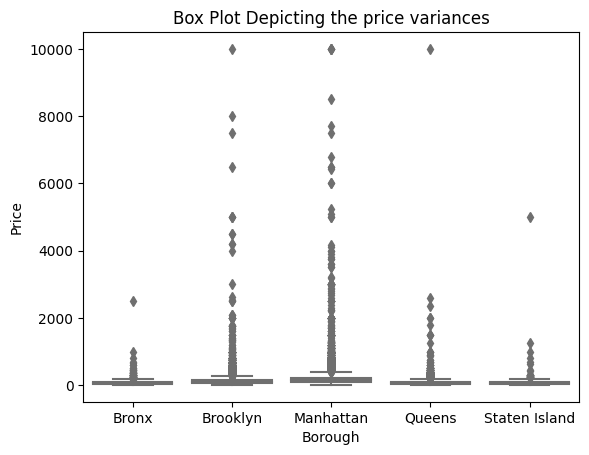

In [27]:
ax = sns.boxplot(x = 'neighbourhood_group',y='price', data = nyc_df, palette='pastel')

plt.title('Box Plot Depicting the price variances')
plt.xlabel('Borough')
plt.ylabel('Price')

plt.show()

* The Box plot depicts that there are a lot of price variable outliers

# Understanding the outliers

> **Q. Are there any outliers in the data and why are they present?**

There seems to be a lot of outliers in prices in airbnb data. Price is a very important factor in our data. We need to identify the outliers, and why are they present.

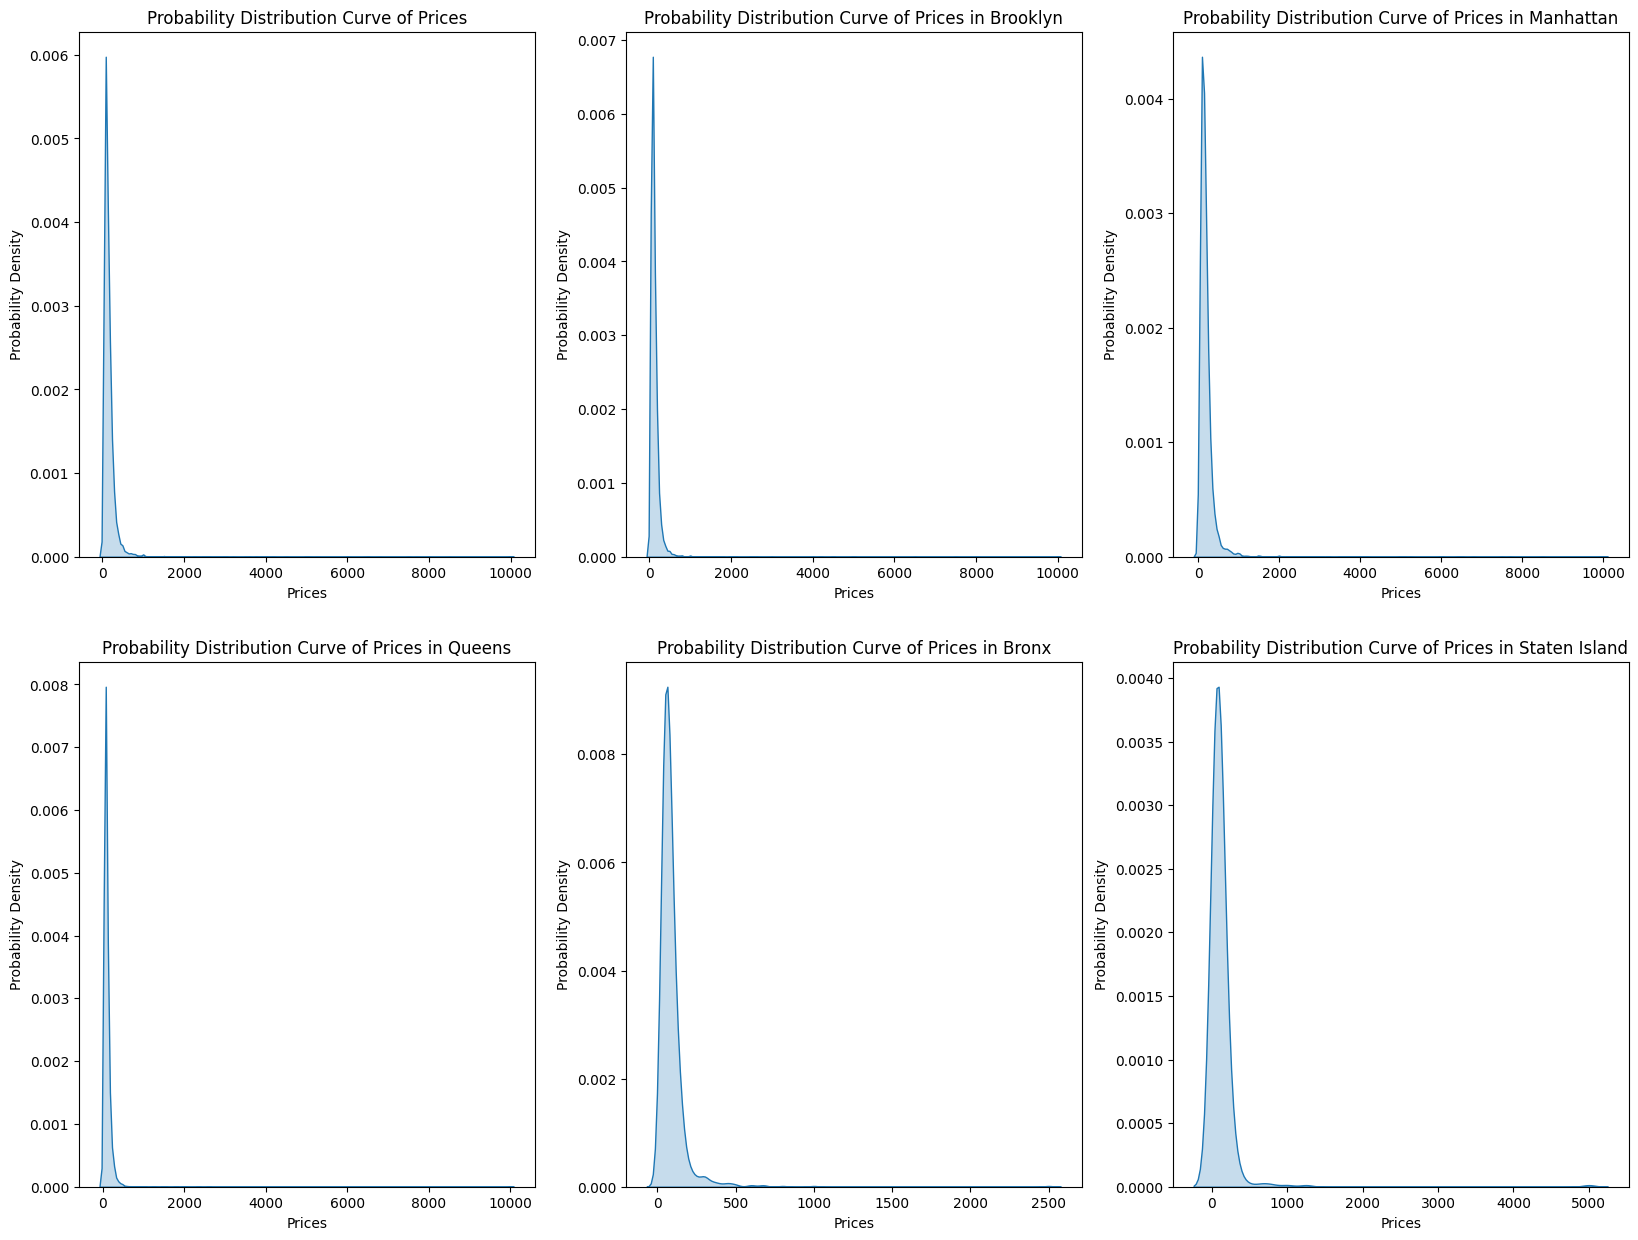

In [28]:
plt.figure(figsize = (20,15))

plt.subplot(2,3,1)
sns.kdeplot(np.sort(nyc_df['price']), fill = True)
plt.title('Probability Distribution Curve of Prices')
plt.xlabel('Prices')
plt.ylabel('Probability Density')

plt.subplot(2,3,2)
sns.kdeplot(np.sort(nyc_df[nyc_df['neighbourhood_group'] == 'Brooklyn']['price']), fill = True)
plt.title('Probability Distribution Curve of Prices in Brooklyn')
plt.xlabel('Prices')
plt.ylabel('Probability Density')

plt.subplot(2,3,3)
sns.kdeplot(np.sort(nyc_df[nyc_df['neighbourhood_group'] == 'Manhattan']['price']), fill = True)
plt.title('Probability Distribution Curve of Prices in Manhattan')
plt.xlabel('Prices')
plt.ylabel('Probability Density')

plt.subplot(2,3,4)
sns.kdeplot(np.sort(nyc_df[nyc_df['neighbourhood_group'] == 'Queens']['price']), fill = True)
plt.title('Probability Distribution Curve of Prices in Queens')
plt.xlabel('Prices')
plt.ylabel('Probability Density')

plt.subplot(2,3,5)
sns.kdeplot(np.sort(nyc_df[nyc_df['neighbourhood_group'] == 'Bronx']['price']), fill = True)
plt.title('Probability Distribution Curve of Prices in Bronx')
plt.xlabel('Prices')
plt.ylabel('Probability Density')

plt.subplot(2,3,6)
sns.kdeplot(np.sort(nyc_df[nyc_df['neighbourhood_group'] == 'Staten Island']['price']), fill = True)
plt.title('Probability Distribution Curve of Prices in Staten Island')
plt.xlabel('Prices')
plt.ylabel('Probability Density')

plt.show()

The Probability Distribution Curves suggest that there seems to be a lot of price outliers, even in every Boroughs.

Now lets fetch the outliers

In [29]:
# Calculating IQR to point out the outliers
Q1 = nyc_df['price'].quantile(0.25)
Q3 = nyc_df['price'].quantile(0.75)
IQR = Q3 - Q1

outliers = nyc_df[(nyc_df['price'] < Q1 - 1.5 * IQR) | (nyc_df['price'] > Q3 + 1.5 * IQR)]
outliers.shape

(2972, 14)

In [30]:
outliers.head()

host_id host_name neighbourhood_group     neighbourhood  latitude  \
61     60278     Petra           Manhattan           Chelsea     40.75   
85     74303    Maggie            Brooklyn  Brooklyn Heights     40.70   
103    93790       Ann           Manhattan      West Village     40.73   
114    72062     Bruce           Manhattan      East Village     40.73   
121   119588      Vero            Brooklyn       South Slope     40.66   

     longitude        room_type  price  minimum_nights  number_of_reviews  \
61      -74.00  Entire home/apt    375             180                  5   
85      -73.99  Entire home/apt    800               1                 25   
103     -74.00  Entire home/apt    500               4                 46   
114     -73.98  Entire home/apt    350               2                  7   
121     -73.98  Entire home/apt    400               2                 16   

    last_review  reviews_per_month  calculated_host_listings_count  \
61   2018-11-03               0.12                               1   
85   2016-08-04               0.24                               1   
103  2019-05-18               0.55                               2   
114  2017-08-09               0.06                               4   
121  2018-12-30               0.24                               2   

     availability_365  
61                180  
85                  7  
103               243  
114               298  
121               216

In [31]:
print(f"Number of unoccupied listings through out the year :",outliers[outliers['last_review'] == '1984-01-01'].shape[0])

# there goes 50% data, i.e most of the users dont occupy these houses

Number of unoccupied listings through out the year : 1040


* About 50% of the data has been unoccupied by any customer through out the year
* Which means even the users find these listings highly priced and did not consider these listings

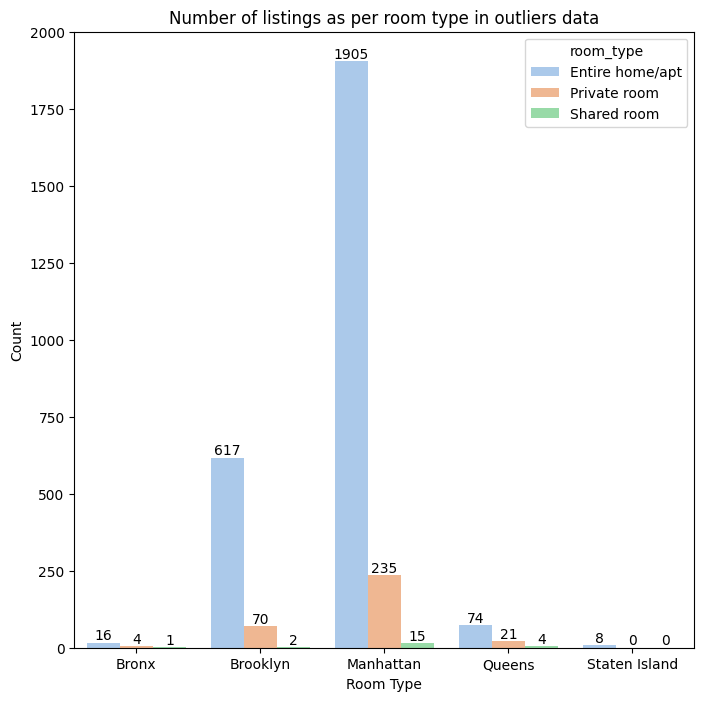

In [32]:
plt.figure(figsize = (8,8))
ax = sns.countplot(data = outliers, x = 'neighbourhood_group', hue = 'room_type', palette = 'pastel')
for container in ax.containers:
    ax.bar_label(container)

plt.title("Number of listings as per room type in outliers data")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()

* Majority of the outliers come from the Manhattan area with the Entire home/apt offered unusually high price

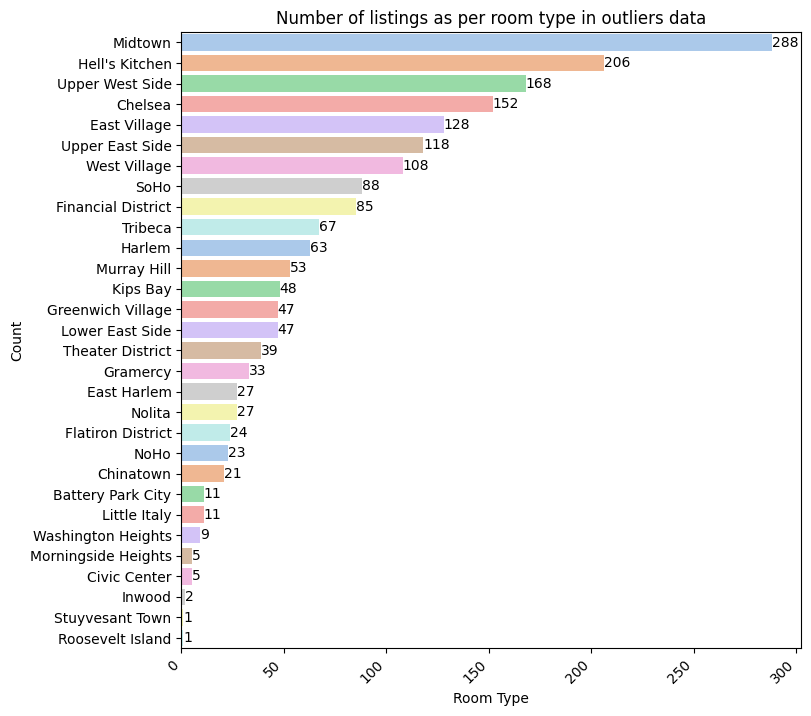

In [33]:
man_outliers = outliers[(outliers['neighbourhood_group']=='Manhattan') & (outliers['room_type']=='Entire home/apt')]
man_df = man_outliers['neighbourhood'].value_counts().reset_index()

plt.figure(figsize = (8,8))
ax = sns.barplot(data = man_df, y = 'neighbourhood', x = 'count', palette = 'pastel')
ax.bar_label(ax.containers[0])

plt.title("Number of listings as per room type in outliers data")
plt.xlabel("Room Type")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count")

plt.show()

* These highly priced listings mostly come from Midtown, Hell's Kitchen, Upper West Side, Chelsea, Upper East Side, West Village, SoHo and Financial District

In [34]:
out_df = pd.DataFrame(outliers[(outliers['neighbourhood_group']=='Manhattan') & (outliers['room_type']=='Entire home/apt')])
out_df['neighbourhood'] = out_df['neighbourhood'].astype('category')

# Create a scatter map using Plotly Express
ax = px.scatter_mapbox(out_df,
    lat='latitude',
    lon='longitude',
    color='neighbourhood',
    title='Map of Neighbourhood')

# Customize the layout
ax.update_layout(mapbox_style="carto-positron")
ax.update_layout(margin=dict(l=0, r=0, b=0, t=40))

# Show the plot
ax.show()

* As discussed, we see that the previously mentioned highly priced areas are present in and around the central part of Manhattan. It might be because of the location advantage as it is near the major happening areas of Manhattan and New York in general

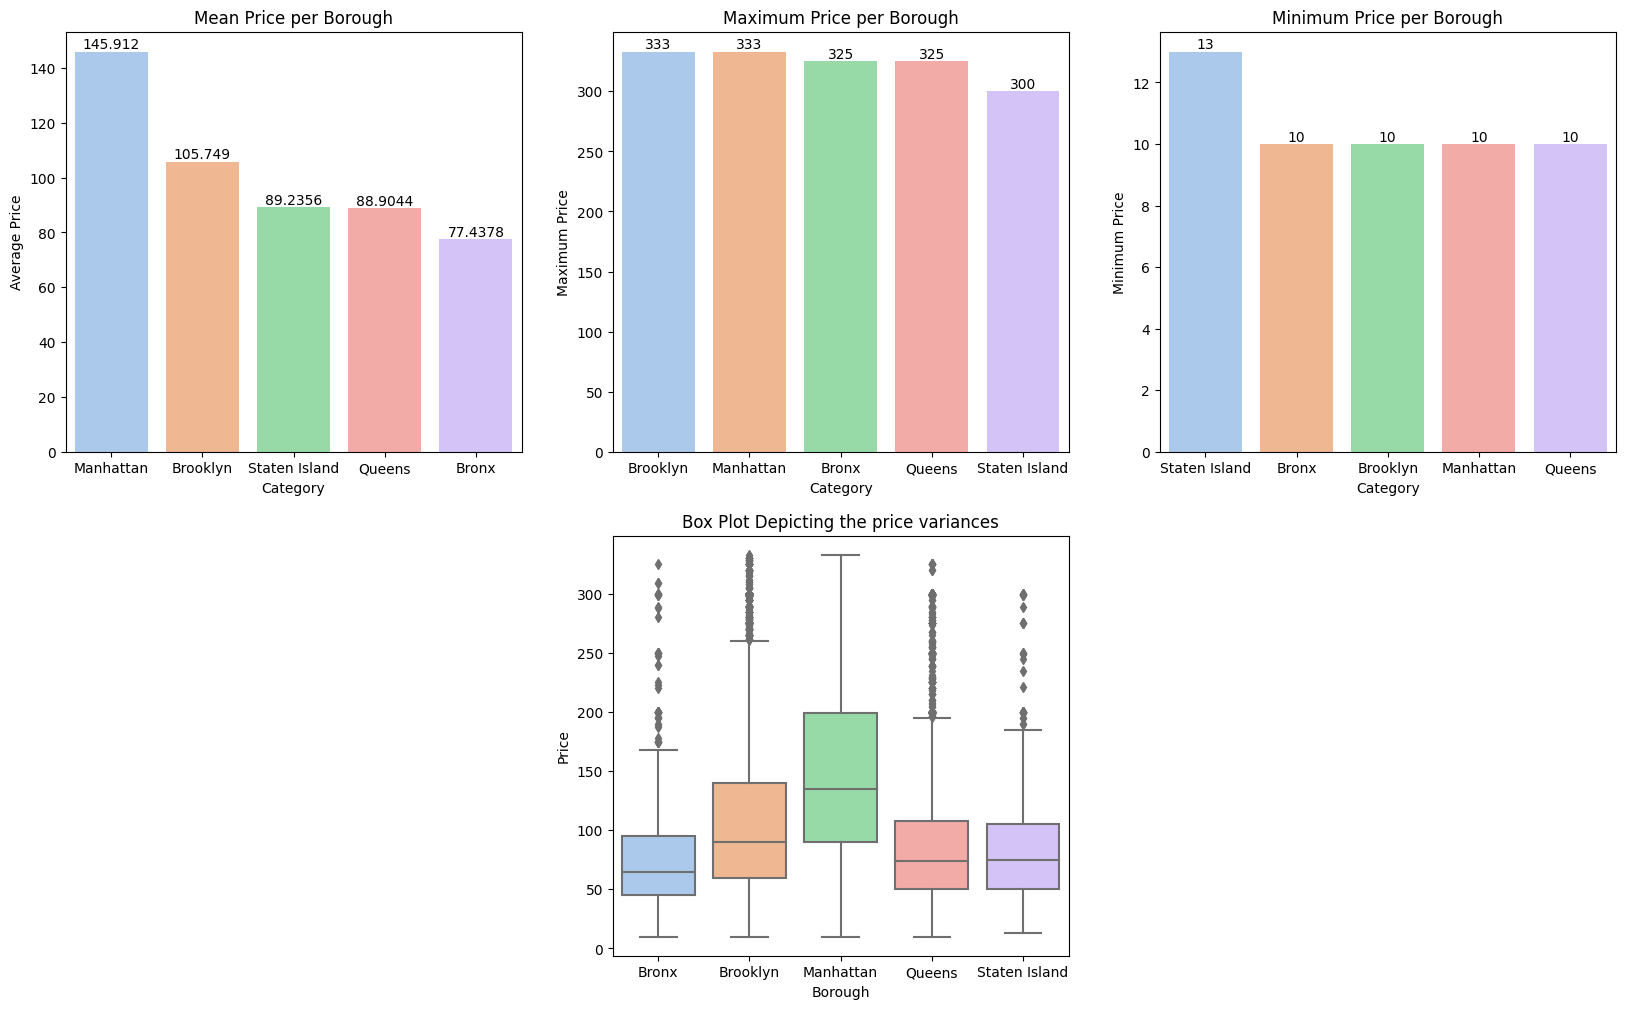

In [35]:
updated_nyc_df = nyc_df[(nyc_df['price'] > Q1 - 1.5 * IQR) & (nyc_df['price'] < Q3 + 1.5 * IQR)]

plt.figure(figsize = (20,12))

plt.subplot(2,3,1)
average_df = updated_nyc_df.groupby('neighbourhood_group')['price'].mean().reset_index()

ax1 = sns.barplot(x='neighbourhood_group', y='price', data=average_df, 
                  order = average_df.sort_values('price', ascending = False)['neighbourhood_group'], palette='pastel')
ax1.bar_label(ax1.containers[0])

plt.title('Mean Price per Borough')
plt.xlabel('Category')
plt.ylabel('Average Price')

plt.subplot(2,3,2)
max_df = updated_nyc_df.groupby('neighbourhood_group')['price'].max().reset_index()

ax2 = sns.barplot(x='neighbourhood_group', y='price', data = max_df, 
                  order = max_df.sort_values('price', ascending = False)['neighbourhood_group'], palette='pastel')
ax2.bar_label(ax2.containers[0])

plt.title('Maximum Price per Borough')
plt.xlabel('Category')
plt.ylabel('Maximum Price')

plt.subplot(2,3,3)
min_df = updated_nyc_df.groupby('neighbourhood_group')['price'].min().reset_index()

ax3 = sns.barplot(x='neighbourhood_group', y='price', data = min_df, 
                  order = min_df.sort_values('price', ascending = False)['neighbourhood_group'], palette='pastel')
ax3.bar_label(ax3.containers[0])

plt.title('Minimum Price per Borough')
plt.xlabel('Category')
plt.ylabel('Minimum Price')

plt.subplot(2,3,5)
ax4 = sns.boxplot(x = 'neighbourhood_group',y='price', data = updated_nyc_df, palette='pastel')

plt.title('Box Plot Depicting the price variances')
plt.xlabel('Borough')
plt.ylabel('Price')

plt.show()

**We observe that:**
* After removing the outliers, Manhattan are still has listings st high prices, while the prices at other boroughs are in a similar range
* While the maximum price of listings in each borough are in the same range (300-333USD)
    * Brooklyn, Manhattan have maximum price at 333USD
    * Bronx, Queens have maximum price at 325USD
    * Staten Island has maximum price at 300USD    
* While the minimum price of listings have remained unaltered (in the range of 10-13USD)

# Mapping the Neighbourhood groups

> **Q. Could you map the neighbourhood groups? Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

In [36]:
# Creating a scatter map using Plotly Express mapping all the boroughs
ax = px.scatter_mapbox(nyc_df,
    lat='latitude',
    lon='longitude',
    color='neighbourhood_group',
    title='Map of Neighbourhood Group')

# Customize the layout
ax.update_layout(mapbox_style="carto-positron")
ax.update_layout(margin=dict(l=0, r=0, b=0, t=40))

# Show the plot
ax.show()

In [37]:
# Creating a scatter map using Plotly Express mapping all the room types
ax = px.scatter_mapbox( nyc_df,
    lat='latitude',
    lon='longitude',
    color='room_type',
    title='Map of Room Types')

# Customize the layout
ax.update_layout(mapbox_style="carto-positron")
ax.update_layout(margin=dict(l=0, r=0, b=0, t=40))

# Show the plot
ax.show()

In [38]:
# Creating a scatter map using Plotly Express mapping all the neighbourhoods
ax = px.scatter_mapbox( nyc_df,
    lat='latitude',
    lon='longitude',
    color='neighbourhood',
    title='Map of Neighbourhoods')

# Customize the layout
ax.update_layout(mapbox_style="carto-positron")
ax.update_layout(margin=dict(l=0, r=0, b=0, t=40))

# Show the plot
ax.show()

In [39]:
# Creating a scatter map using Plotly Express mapping all the top listed neighbourhoods
df = pd.DataFrame(nyc_df['neighbourhood'].value_counts().reset_index())
ls = list(df['neighbourhood'].head(10))

ax = px.scatter_mapbox(nyc_df[nyc_df['neighbourhood'].isin(ls)],
    lat='latitude',
    lon='longitude',
    color='neighbourhood',
    title='Map of Top listed Neighbourhoods')

# Customize the layout
ax.update_layout(mapbox_style="carto-positron")
ax.update_layout(margin=dict(l=0, r=0, b=0, t=40))

# Show the plot
ax.show()

**We observe that:**
* Areas with most number of listings are around the Central Park bordering the Jersey city
* While the areas near the Brooklyn Bridge and the central part of Brooklyn have most number of listings
* These regions are either in the happening areas or placed near the important places of New York

# Understanding Correlation

> **Q. Is there any kind of relation between the columns/variables?**

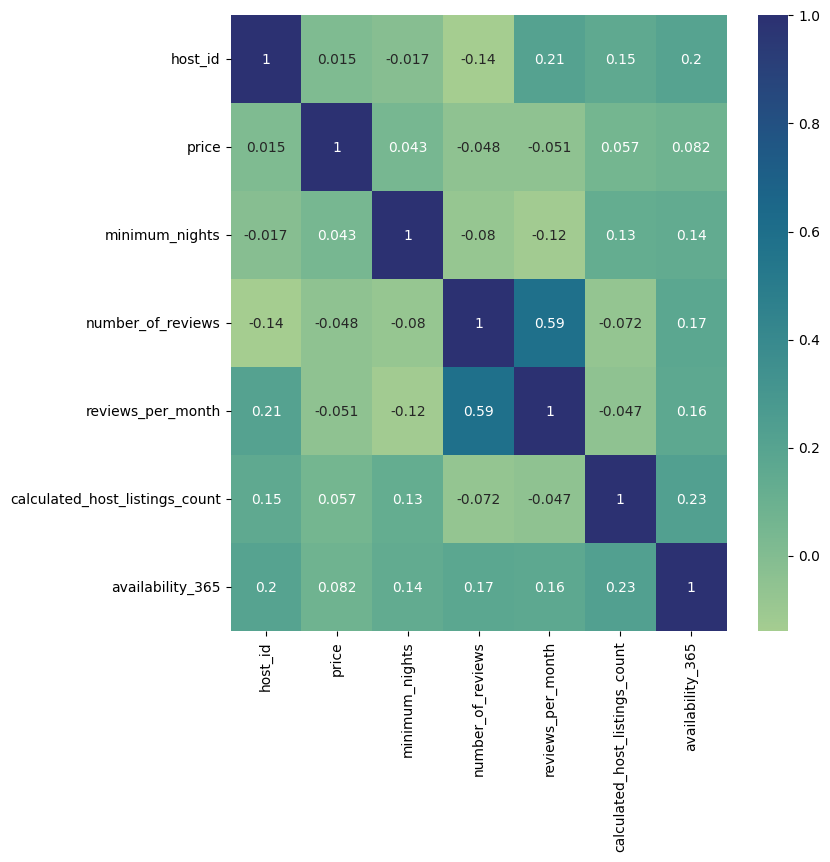

In [40]:
correlation_data = nyc_df.select_dtypes(['int64','float64'])
correlation_data.drop(['latitude','longitude'], axis = 1, inplace = True)

plt.figure(figsize = (8,8))
sns.heatmap(correlation_data.corr(), annot = True, cmap = 'crest')

plt.show()

**We can observe that:**
* It is clear that there is a strong correlation of 0.6 between reviews_per_month and number_of_reviews
* The price factor seems to be indipendent of the variables present in data

# Busiest Hosts

> **Q. Which hosts are the busiest?**

In [41]:
print(f"Total number of Hosts in NYC : ", len(nyc_df['host_id'].unique()))

Total number of Hosts in NYC :  37455


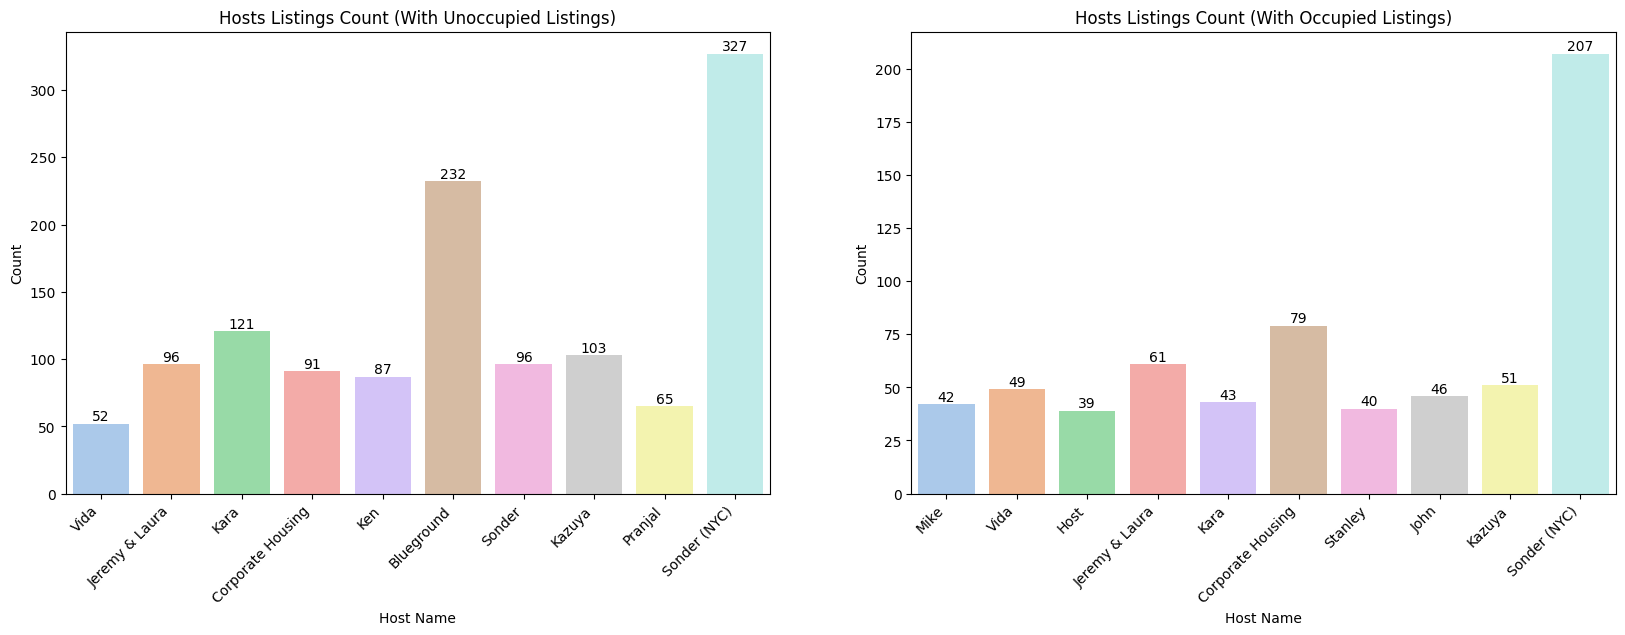

In [42]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
hosts = nyc_df['host_id'].value_counts().head(10).reset_index()

ax = sns.countplot(x='host_name', data = nyc_df[nyc_df['host_id'].isin(hosts['host_id'])], palette='pastel')
ax.bar_label(ax.containers[0])

plt.title('Hosts Listings Count (With Unoccupied Listings)')
plt.xlabel('Host Name')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')


plt.subplot(1,2,2)
hosts_occupied = nyc_df[nyc_df['reviews_per_month'] != 0]['host_id'].value_counts().head(10).reset_index()

ax = sns.countplot(x='host_name', data = nyc_df[(nyc_df['host_id'].isin(hosts_occupied['host_id'])) & (nyc_df['reviews_per_month'] != 0)], palette='pastel')
ax.bar_label(ax.containers[0])

plt.title('Hosts Listings Count (With Occupied Listings)')
plt.xlabel('Host Name')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')

# Show the plot
plt.show()

**We observe that:**
* Sonder(NYC) and Blueground has the most number of listings even if they are unoccupied, while Corporate Housing comes second if only occupied listings are considered
* Hence it is evident that even the real estate companies like Sonder(NYC), Blueground, Corporate Housing and other people with houses have shown interest in using airbnb as a platform to host their listings
* It can be because of it is a top real-estate tech company, has a global reach and famous among the young and working class generation

In [43]:
print("The average nights requested by a host for the advertised listings")
avg_df = nyc_df.groupby(['host_id','host_name'])['minimum_nights'].mean().reset_index()
avg_df[avg_df['host_id'].isin([107434423,61391963,219517861])]

The average nights requested by a host for the advertised listings


host_id          host_name  minimum_nights
25660   61391963  Corporate Housing           30.33
29405  107434423         Blueground           32.20
34644  219517861       Sonder (NYC)           13.31

In [44]:
print("The Neighbourhoods where the Sonder(NYC) has listed : \n")

i=0
for item in nyc_df[nyc_df['host_id'] == 219517861].neighbourhood.unique():
    i+=1
    print(str(i) + ". "+ item)
    
print("\nThe Neighbourhoods where the Blueground has listed : \n")

i=0
for item in nyc_df[nyc_df['host_id'] == 107434423].neighbourhood.unique():
    i+=1
    print(str(i) + ". "+ item)
    
print("\nThe Neighbourhoods where the Corporate Housing has listed : \n")

i=0
for item in nyc_df[nyc_df['host_id'] == 61391963].neighbourhood.unique():
    i+=1
    print(str(i) + ". "+ item)

The Neighbourhoods where the Sonder(NYC) has listed : 

1. Financial District
2. Murray Hill
3. Hell's Kitchen
4. Midtown
5. Theater District
6. Chelsea
7. Upper East Side

The Neighbourhoods where the Blueground has listed : 

1. Kips Bay
2. Financial District
3. Murray Hill
4. Tribeca
5. Upper East Side
6. Theater District
7. Battery Park City
8. East Village
9. Hell's Kitchen
10. Upper West Side
11. Chelsea
12. West Village
13. Midtown
14. Lower East Side
15. DUMBO
16. Flatiron District
17. Gramercy
18. Nolita
19. NoHo
20. SoHo
21. Williamsburg

The Neighbourhoods where the Corporate Housing has listed : 

1. Upper East Side
2. Little Italy
3. Hell's Kitchen
4. Kips Bay
5. Midtown
6. Greenwich Village
7. Upper West Side
8. Chelsea
9. Nolita
10. Murray Hill


**We observe that:**
* The companies who have most number of listings have listed all their apartments around many locations of the city
* Moreover the companies have used airbnb as a platform for medium and short stay (about a month) time periods
* The residents of New York City struggle to locate homes for long-term leases because there are only about 49000 residences listed for medium- and short-term stays. As a result, the rent for other homes will also increase.

# Understanding the Null values

> **Q. Why are few values reviews_per_month column null?**

In [45]:
# Why are these particular entries having null last_review column
# What might be the reasons for the values to be null
noshow_df = nyc_df[nyc_df['reviews_per_month']==0]

noshow_df.head()

host_id        host_name neighbourhood_group       neighbourhood  \
2      4632        Elisabeth           Manhattan              Harlem   
19    17985             Sing           Manhattan         East Harlem   
26    26394  Claude & Sophie           Manhattan              Inwood   
36     7355               Vt            Brooklyn  Bedford-Stuyvesant   
38    45445          Harriet            Brooklyn            Flatbush   

    latitude  longitude        room_type  price  minimum_nights  \
2      40.81     -73.94     Private room    150               3   
19     40.80     -73.95  Entire home/apt    190               7   
26     40.87     -73.93     Private room     80               4   
36     40.69     -73.94     Private room     35              60   
38     40.64     -73.96     Private room    150               1   

    number_of_reviews last_review  reviews_per_month  \
2                   0  1984-01-01               0.00   
19                  0  1984-01-01               0.00   
26                  0  1984-01-01               0.00   
36                  0  1984-01-01               0.00   
38                  0  1984-01-01               0.00   

    calculated_host_listings_count  availability_365  
2                                1               365  
19                               2               249  
26                               1                 0  
36                               1               365  
38                               1               365

* It might be possible that these listings were not booked by any user during the year of 2019. Otherwise airbnb always ensures that a user always gives a rating and review after the stay has ended
* Hence it is safe to assume that these listings were not occupied by any user and hence did not have any review. Hence the reviews_per_month variable is zero (previously null)

In [46]:
# Checking the number of entries in dataset and number of columns
print(f"The total number of entries are :", noshow_df.shape[0])
print(f"The total number of columns are :", noshow_df.shape[1])

The total number of entries are : 10051
The total number of columns are : 14


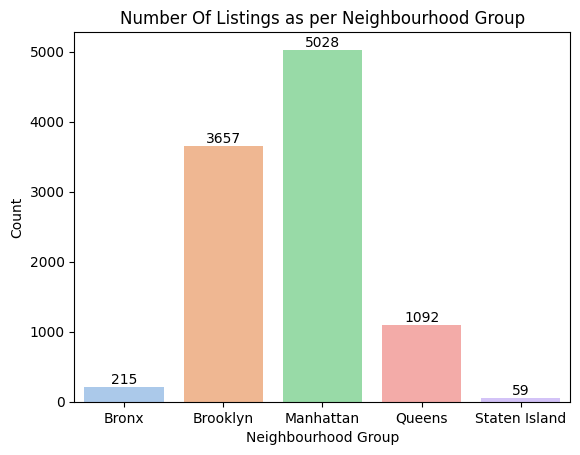

In [47]:
ax = sns.countplot(data = noshow_df, x = 'neighbourhood_group', palette = 'pastel')
ax.bar_label(ax.containers[0])

plt.title('Number Of Listings as per Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

In [48]:
# Percentage of Unbooked Airbnb listings in each Borough
borough_series = noshow_df['neighbourhood_group'].value_counts()*100.00/nyc_df['neighbourhood_group'].value_counts()
print(borough_series.sort_values(ascending = False))

neighbourhood_group
Manhattan       23.21
Bronx           19.72
Queens          19.27
Brooklyn        18.20
Staten Island   15.82
Name: count, dtype: float64


In [49]:
# Percentage of Unbooked Airbnb listings for each room type
room_series = noshow_df['room_type'].value_counts()*100.00/nyc_df['room_type'].value_counts()

print(room_series.sort_values(ascending = False))

room_type
Shared room       27.12
Private room      20.88
Entire home/apt   19.98
Name: count, dtype: float64


**We Observe that:**
* About a quarter of listings in Manhattan were not occupied by any user
* Similaryly, many listings have not been booked by any user in other boroughs of the city during the year of 2019
* Also the shared rooms seems to have the highest rate of unoccupancy

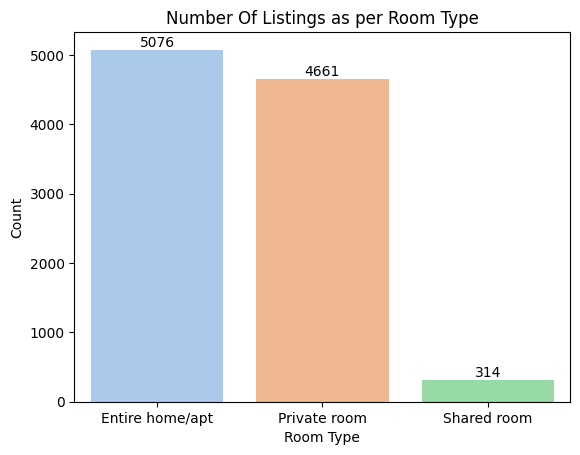

In [50]:
ax = sns.countplot(data = noshow_df, x = 'room_type', palette = 'pastel')
ax.bar_label(ax.containers[0])

plt.title('Number Of Listings as per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

In [51]:
noshow_df[noshow_df['availability_365'] == 0].shape

(4844, 14)

* We can see that the availability_365 column has zero availabilities for the half of the entries. Which means the data had few inactive listings. 


Let us explore the other half entries.

In [52]:
no_noshow = noshow_df[noshow_df['availability_365'] != 0]

In [53]:
# Create a scatter map using Plotly Express
ax = px.scatter_mapbox( no_noshow,
    lat='latitude',
    lon='longitude',
    color='neighbourhood_group',
    title='Map of Boroughs')

# Customize the layout
ax.update_layout(mapbox_style="carto-positron")
ax.update_layout(margin=dict(l=0, r=0, b=0, t=40))

# Show the plot
ax.show()

* The listings seems to be scattered all around the New York city, but many of them seemed to be concentrated in Manhattan

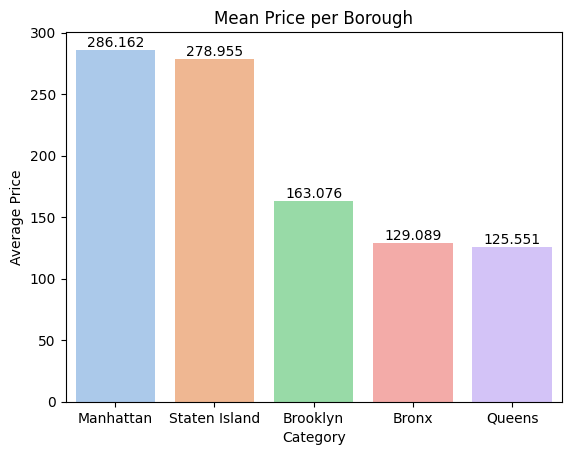

In [54]:
average_df = no_noshow.groupby('neighbourhood_group')['price'].mean().reset_index()

ax1 = sns.barplot(x='neighbourhood_group', y='price', data=average_df, 
                  order = average_df.sort_values('price', ascending = False)['neighbourhood_group'], palette='pastel')
ax1.bar_label(ax1.containers[0])

plt.title('Mean Price per Borough')
plt.xlabel('Category')
plt.ylabel('Average Price')

plt.show()

* It is evident that average price of each listing is quite high for a medium or short term lease bookings. The prices are particularly high in Manhattan and Staten Island
* The premium price of these rooms might be one of the inhibitors for users to not consider living in these listings 

In [55]:
#The dataset containing the rooms unoccupied by any user for the year
no_noshow

host_id      host_name neighbourhood_group       neighbourhood  \
2          4632      Elisabeth           Manhattan              Harlem   
19        17985           Sing           Manhattan         East Harlem   
36         7355             Vt            Brooklyn  Bedford-Stuyvesant   
38        45445        Harriet            Brooklyn            Flatbush   
204      253385        Douglas           Manhattan              Harlem   
...         ...            ...                 ...                 ...   
48890   8232441        Sabrina            Brooklyn  Bedford-Stuyvesant   
48891   6570630        Marisol            Brooklyn            Bushwick   
48892  23492952  Ilgar & Aysel           Manhattan              Harlem   
48893  30985759            Taz           Manhattan      Hell's Kitchen   
48894  68119814     Christophe           Manhattan      Hell's Kitchen   

       latitude  longitude        room_type  price  minimum_nights  \
2         40.81     -73.94     Private room    150               3   
19        40.80     -73.95  Entire home/apt    190               7   
36        40.69     -73.94     Private room     35              60   
38        40.64     -73.96     Private room    150               1   
204       40.80     -73.96     Private room    200              30   
...         ...        ...              ...    ...             ...   
48890     40.68     -73.95     Private room     70               2   
48891     40.70     -73.93     Private room     40               4   
48892     40.81     -73.95  Entire home/apt    115              10   
48893     40.76     -73.99      Shared room     55               1   
48894     40.76     -73.99     Private room     90               7   

       number_of_reviews last_review  reviews_per_month  \
2                      0  1984-01-01               0.00   
19                     0  1984-01-01               0.00   
36                     0  1984-01-01               0.00   
38                     0  1984-01-01               0.00   
204                    0  1984-01-01               0.00   
...                  ...         ...                ...   
48890                  0  1984-01-01               0.00   
48891                  0  1984-01-01               0.00   
48892                  0  1984-01-01               0.00   
48893                  0  1984-01-01               0.00   
48894                  0  1984-01-01               0.00   

       calculated_host_listings_count  availability_365  
2                                   1               365  
19                                  2               249  
36                                  1               365  
38                                  1               365  
204                                 1               365  
...                               ...               ...  
48890                               2                 9  
48891                               2                36  
48892                               1                27  
48893                               6                 2  
48894                               1                23  

[5207 rows x 14 columns]

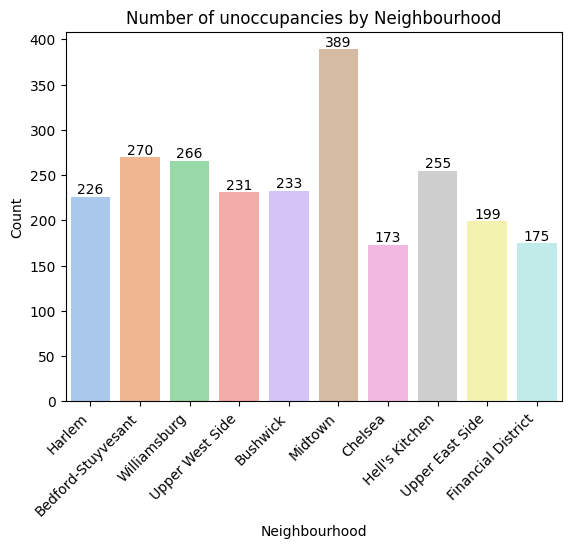

In [56]:
temp_df = pd.DataFrame(no_noshow['neighbourhood'].value_counts().reset_index())
ls = list(temp_df['neighbourhood'].head(10))

ax = sns.countplot(x='neighbourhood', data=no_noshow[no_noshow['neighbourhood'].isin(ls)], palette='pastel')
ax.bar_label(ax.containers[0])

plt.title('Number of unoccupancies by Neighbourhood')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')

plt.show()

In [57]:
print(f"The average prices in Midtown:", no_noshow[no_noshow.neighbourhood == 'Midtown']['price'].mean())
print('\n')
print("\nThe active listings present in the Midtown are")
nyc_df[(nyc_df.neighbourhood == 'Midtown') & (nyc_df.availability_365 != 0)].sort_values('price')

The average prices in Midtown: 312.68380462724934



The active listings present in the Midtown are


host_id       host_name neighbourhood_group neighbourhood  latitude  \
2527     7089676  Michel Fabrice           Manhattan       Midtown     40.76   
46628  266128085         Wanfang           Manhattan       Midtown     40.75   
45945  263712096           Nacho           Manhattan       Midtown     40.75   
39269    5300413           James           Manhattan       Midtown     40.77   
30875    1429710          Bonnie           Manhattan       Midtown     40.76   
...          ...             ...                 ...           ...       ...   
39912   26556695          Alyssa           Manhattan       Midtown     40.76   
19802   26556695          Alyssa           Manhattan       Midtown     40.76   
19270     836168           Henry           Manhattan       Midtown     40.75   
18356     836168           Henry           Manhattan       Midtown     40.76   
43009   16105313           Debra           Manhattan       Midtown     40.74   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
2527      -73.97     Private room     50               1                 49   
46628     -73.99     Private room     55              30                  0   
45945     -73.98      Shared room     60               1                  0   
39269     -73.98     Private room     60              30                  0   
30875     -73.97      Shared room     63               1                 18   
...          ...              ...    ...             ...                ...   
39912     -73.97  Entire home/apt   1999               1                  0   
19802     -73.97  Entire home/apt   2000               2                  3   
19270     -73.98  Entire home/apt   2000              30                  4   
18356     -73.98  Entire home/apt   2500              30                  4   
43009     -73.98  Entire home/apt   5100              30                  1   

      last_review  reviews_per_month  calculated_host_listings_count  \
2527   2017-12-30               0.91                               1   
46628  1984-01-01               0.00                               1   
45945  1984-01-01               0.00                               3   
39269  1984-01-01               0.00                               1   
30875  2019-06-03               1.20                               1   
...           ...                ...                             ...   
39912  1984-01-01               0.00                               6   
19802  2019-05-31               0.38                               6   
19270  2017-03-11               0.12                              11   
18356  2017-04-17               0.13                              11   
43009  2019-06-22               1.00                               2   

       availability_365  
2527                 14  
46628                41  
45945                43  
39269               125  
30875                56  
...                 ...  
39912               365  
19802               364  
19270               365  
18356               364  
43009               343  

[1087 rows x 14 columns]

**We can observe that:**
* There are listings in the same area(Midtown), which are as cheap as 30 USD, where as the average price is 312 USD
* Since there are listings with better prices at the same location, the premium priced listings are left unoccupied any any user
* Because the users of New York consider booking in airbnb for short or medium stay and price would be one of their conerns while finalizing a stay

# Conclusion

Airbnb has revolutionized the hospitality industry by offering a unique and decentralized approach to lodging. The platform has empowered hosts to share their spaces and guests to experience a more personalized and authentic travel experience. However, its success has not been without any challenges. Regulatory issues, and concerns over housing shortages have prompted increased scrutiny and legal battles in various cities like New York. 

One of the primary reasons for Airbnb facing challenges in New York was the city's efforts to regulate short-term rentals. These regulations were put in place to address concerns related to housing availability, rising rental prices, and the potential negative impact on neighborhoods.

The city's stance was reasonable as the medium and short-term rentals could contribute to a reduction in the housing supply for residents, as property owners might prefer renting to tourists for higher nightly rates rather than offering long-term leases to locals. Thereby, inflating the rent of the other available houses which ultimately creates an imbalance in the economy. The city asked the hosts to follow specific guidelines, such as renting only a portion of their homes while they were present, or facing fines and penalties. However, this proved unsatisfactory to either parties and ultimately stopped airbnb from conducting business in New York city.

# Thank You

I hope my analysis was useful, and I would greatly appreciate any kind of input :)